### Which Machine LEarning Models Are Sensitive To Outliers?

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

**Reference:**<br>
https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Techniques to detect outliers
1. Mean +- 3std technique if feature is normally distributed
2. 75% percentile + 1.5IQR, 25% - 1.5IQR if feature is not normally distributed (boxplot)
3. Anything above 98% or lower than 2%percentile (or any percentile that we choose)
4. K-Means Clustering 

### 1. If The Data Is Normally Distributed we use the mean std technique

**How it works?** <br>
Suppose the feature is normally distributed. Every value that is higher than mean + 3std or lower than mean - 3std is considered as on outlier.

Text(0, 0.5, 'No of passenger')

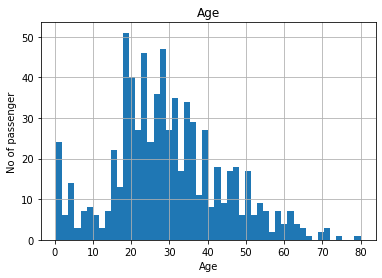

In [4]:
# Age is similar to Gaussian Distribution

figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [24]:
def detect_outliers(df, features):
    for var in features:
        uppper_boundary=df[var].mean() + 3* df[var].std()
        lower_boundary=df[var].mean() - 3* df[var].std()
        outliers = list(df[(df[var] > uppper_boundary) | (df[var] < lower_boundary)][var])
        print(f'Feature : {var} , Upperbound : {uppper_boundary} , Lowerbound : {lower_boundary}')
        print(f'Nr of Outliers : {len(outliers)} , Outliers : {outliers}')
        print()

In [25]:
detect_outliers(df, ['Age'])

Feature : Age , Upperbound : 73.27860964406095 , Lowerbound : -13.88037434994331
Nr of Outliers : 2 , Outliers : [80.0, 74.0]



### 2. If the data is not normally distributed we follow the IQR (boxplot) technique

**How it works?** <br>
Suppose the feature is not normally distributed. Every value that is higher than 75% percentile + 1.5*IQR or lower than 25% percentile - 1.5*IQR is considered as outlier. <br>

**Note:**<br>
The default coefficient is 1.5. If we want to have less outlier we must increase it, if we want more outlier we must decrease it. <br>
These outliers are shown when we use boxplot to find outliers.

Text(0, 0.5, 'No of passenger')

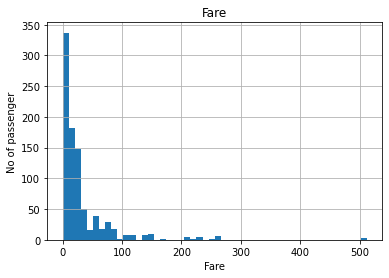

In [20]:
# Fare is not normally distributed but is right skewed
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [26]:
def detect_outlier(df, features, coefficient=1.5):
    for var in features:
        IQR = df[var].quantile(0.75)-df[var].quantile(0.25)
        lower_boundary = df[var].quantile(0.25)-(IQR*coefficient)
        uppper_boundary = df[var].quantile(0.75)+(IQR*coefficient) 
        outliers = list(df[(df[var] > uppper_boundary) | (df[var] < lower_boundary)][var])
        print(f'Feature : {var} , Upperbound : {uppper_boundary} , Lowerbound : {lower_boundary}')
        print(f'Nr of Outliers : {len(outliers)} , Outliers : {outliers}')
        print()

In [27]:
detect_outlier(df, ['Fare'], coefficient=1.5)

Feature : Fare , Upperbound : 65.6344 , Lowerbound : -26.724
Nr of Outliers : 116 , Outliers : [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 1

### 3. Every points that is above 95 or 97% percentile (or any percentile that we decide) may be considered as outlier.

### Techniques to handle the outliers

1. Based on domain knowledge (in most of the cases outliers are handled based on the domain knowledge. We usually remove the outliers from the data because they are special cases and we dont our model to fit to /learn from those data points because the aim is to create a generalized model but there might be also cases when we dont remove the outliers in order to not lose too much information from the data for example if there are many outliers or we can go for outlier imputation)
2. Gaussian Transformations like Log Transformation, Boxcox etc. These techniques are goint to remove most of outliers since they change the distribution of data into normal distribution.
3. General techniques like removing all records where we detect outliers using the techniques above (mean std and iqr quantile technique)
4. Imputing the outliers